<a href="https://colab.research.google.com/github/Jumulisa/Student-Score-Prediction-API/blob/main/Jolly_UMULISA_Summative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**We load the dataset**

In [ ]:
import pandas as pd

# New dataset URL
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

# Load dataset
df = pd.read_csv(url)

# Show the first few rows
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Check for missing values
df.isnull().sum()


,0
Hours,0
Scores,0


Get Basic Statistics

In [ ]:
# Get basic statistics
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


 Visualize the Data

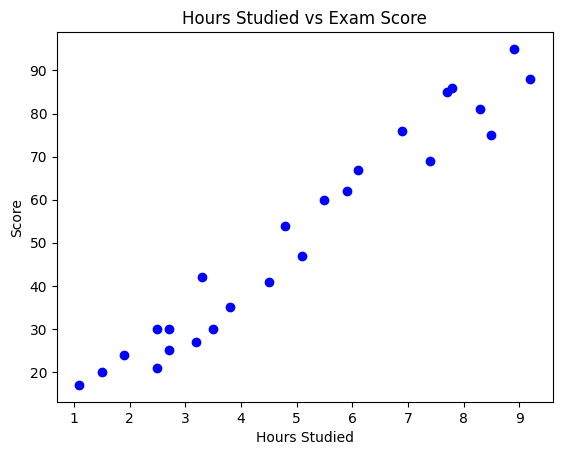

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(df['Hours'], df['Scores'], color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.title('Hours Studied vs Exam Score')
plt.show()

 Split the Data into Training & Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into input (X) and output (y)
X = df[['Hours']]  # Independent variable
y = df['Scores']   # Dependent variable

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the datasets
X_train.shape, X_test.shape


((20, 1), (5, 1))

Train the Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print the model's coefficient and intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


Coefficient: 9.682078154455697
Intercept: 2.826892353899737


 Make Predictions

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Show the first five predictions vs actual values
import pandas as pd

results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results.head())


   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


 Calculate Performance Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)   # Mean Squared Error
rmse = np.sqrt(mse)                        # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)              # R² Score

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 3.92
Mean Squared Error (MSE): 18.94
Root Mean Squared Error (RMSE): 4.35
R² Score: 0.97


 Interpret the Results
MAE (Mean Absolute Error): Measures the average difference between actual and predicted values. Lower is better.
MSE (Mean Squared Error): Similar to MAE but squares the errors, giving more weight to larger mistakes.
RMSE (Root Mean Squared Error): The square root of MSE, making it more interpretable.
R² Score: Tells how well the independent variable explains the dependent variable. A score close to 1 means a good fit.

 **Plot Actual vs. Predicted Values**

This helps us understand how well the model's predictions match the real data.

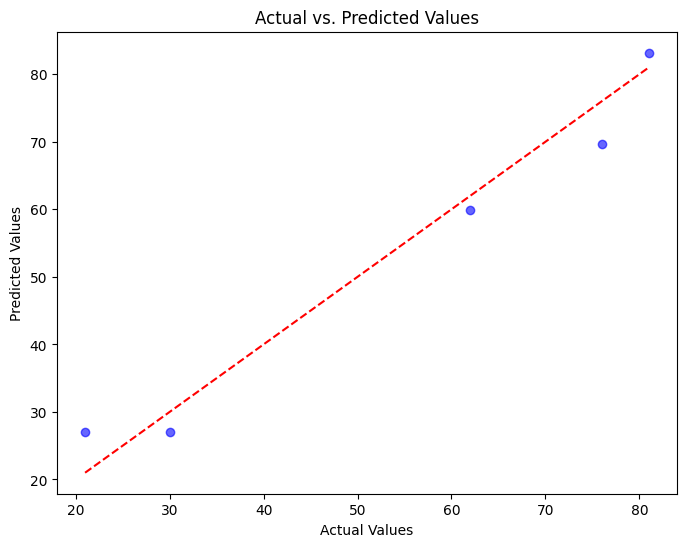

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


 Plot the Regression Line

---



 For simple linear regression, we can plot the regression line over the dataset.

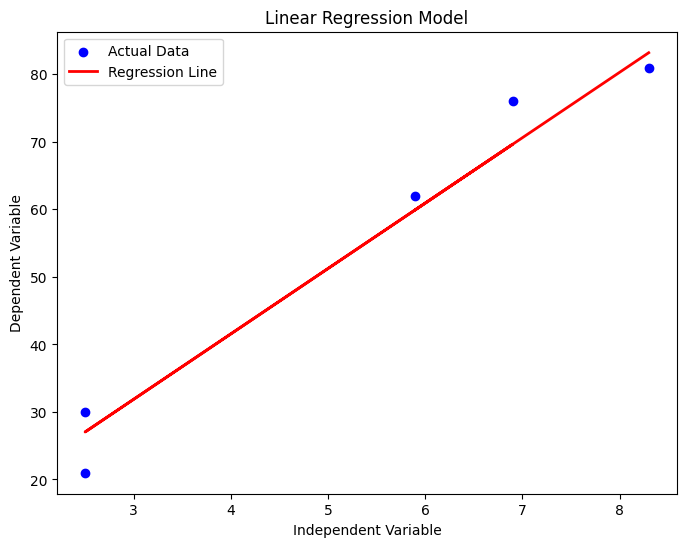

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Linear Regression Model")
plt.legend()
plt.show()

 Train Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test)

# Evaluate Decision Tree Model
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print(f"Decision Tree MSE: {dt_mse:.2f}")
print(f"Decision Tree R² Score: {dt_r2:.2f}")


Decision Tree MSE: 31.70
Decision Tree R² Score: 0.95


Train Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest Model
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R² Score: {rf_r2:.2f}")


Random Forest MSE: 13.05
Random Forest R² Score: 0.98


Compare All Models

In [ ]:
# Print all results
print("Model Comparison:")
print(f"Linear Regression MSE: {mse:.2f}, R²: {r2:.2f}")
print(f"Decision Tree MSE: {dt_mse:.2f}, R²: {dt_r2:.2f}")
print(f"Random Forest MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}")


Model Comparison:
Linear Regression MSE: 18.94, R²: 0.97
Decision Tree MSE: 31.70, R²: 0.95
Random Forest MSE: 13.05, R²: 0.98


 Save the Best Model Using **joblib**

---
Since Random Forest has the lowest MSE (13.05) and the highest R² (0.98), we’ll save this model for later use.


In [3]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import joblib

# Load your dataset
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

# Prepare the data
X = df[['Hours']]  # Features
y = df['Scores']  # Target variable

# Train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Save the model to the 'notebooks' folder
joblib.dump(rf_model, "/best_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
!pip install fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.2 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LinearRegression

# Sample training data
X = [[5, 10], [3, 12], [4, 14]]  # Example input
y = [60, 55, 60]  # Example target values

# Train the model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [7]:
import joblib

# Save the trained model
joblib.dump(rf_model, "/best_model.pkl")


['/best_model.pkl']

Load & Test the Saved Model

In [8]:
from sklearn.linear_model import LinearRegression
import joblib
from google.colab import files

# Step 1: Train the model
X = [[5, 10], [3, 12], [4, 14]]  # Example input
y = [60, 55, 60]  # Example target values

model = LinearRegression()
model.fit(X, y)

# Step 2: Save the trained model
joblib.dump(rf_model, "/best_model.pkl")

# Step 3: Download the saved model
files.download('/best_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>